# Data visualization and EDA on World happiness dataset

In [1]:
## Import libaries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
world = pd.read_csv('world-happiness-report-2021.csv')

In [4]:
world.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
world_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [6]:
world = world[world_columns].copy()

In [7]:
world_df = world.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perception_of_corruption'},axis=1)

In [8]:
world_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perception_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [9]:
world_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perception_of_corruption        0
dtype: int64

In [10]:
world_df.describe()

,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perception_of_corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


# Plot betwee happiness_score & logged_GDP_per_capita

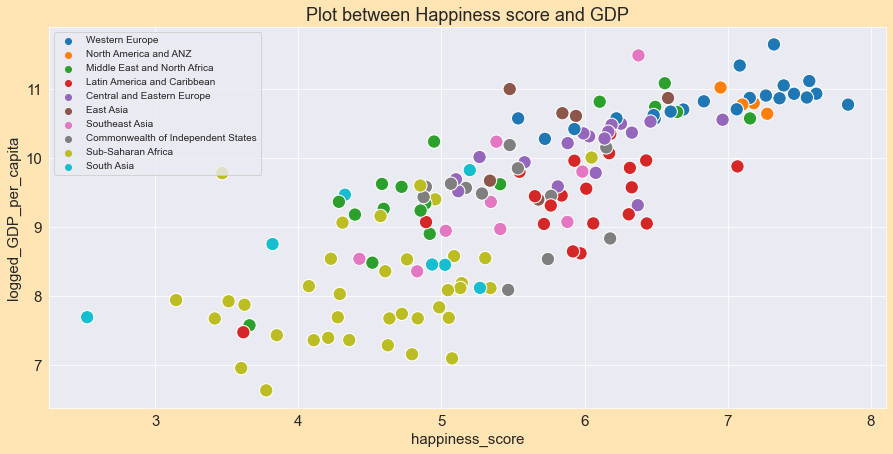

In [11]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness score and GDP')
sns.scatterplot(x=world_df.happiness_score,y=world_df.logged_GDP_per_capita,data=world_df,hue=world_df.regional_indicator,s=180);
plt.legend(loc='upper left', fontsize='10')
plt.show()

In [12]:
gdp_region = world_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

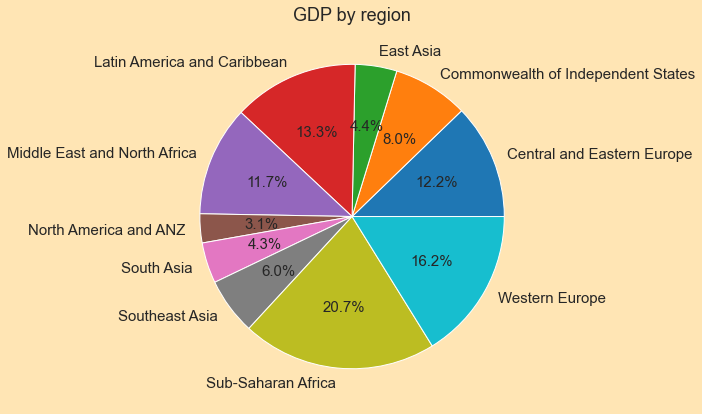

In [13]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by region')
plt.ylabel('')


# Calculation of total country of each region

In [14]:
total_country = world_df.groupby('regional_indicator')['country_name'].count()
total_country

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

# Correlation on the variables

<AxesSubplot:>

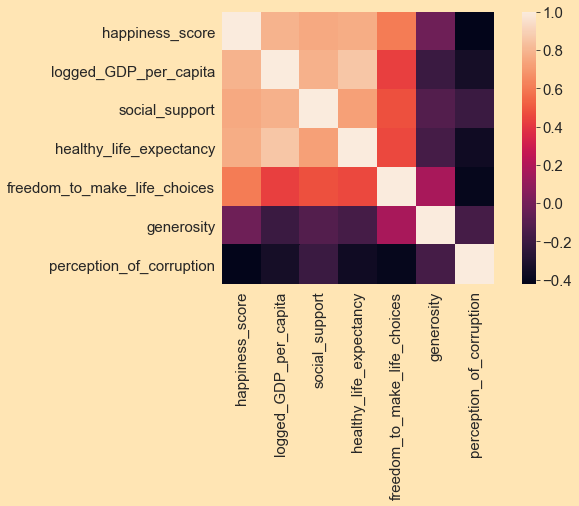

In [15]:
cor = world_df.corr(method = "pearson")
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor,square = True,ax=ax)

# corruption in regions

In [16]:
corruption = world_df.groupby('regional_indicator')[['perception_of_corruption']].mean()
corruption

,perception_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

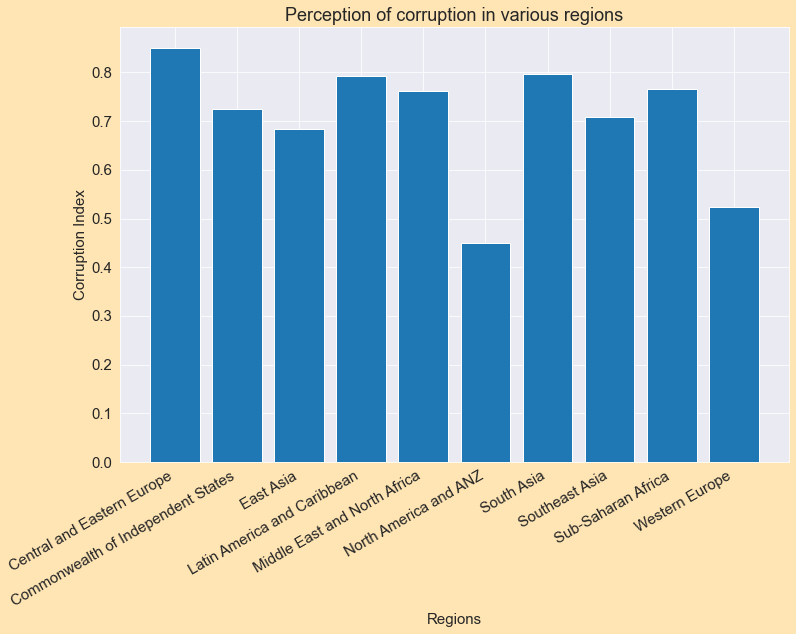

In [17]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Perception of corruption in various regions')
plt.xlabel('Regions',fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30,ha='right')
plt.bar(corruption.index,corruption.perception_of_corruption)

In [19]:
top_10 = world_df.head(10)
bottom_10 = world_df.tail(10)

<ipython-input-21-6333f1c8cefc>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation = 45, ha='right')
<ipython-input-21-6333f1c8cefc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Life expectancy')

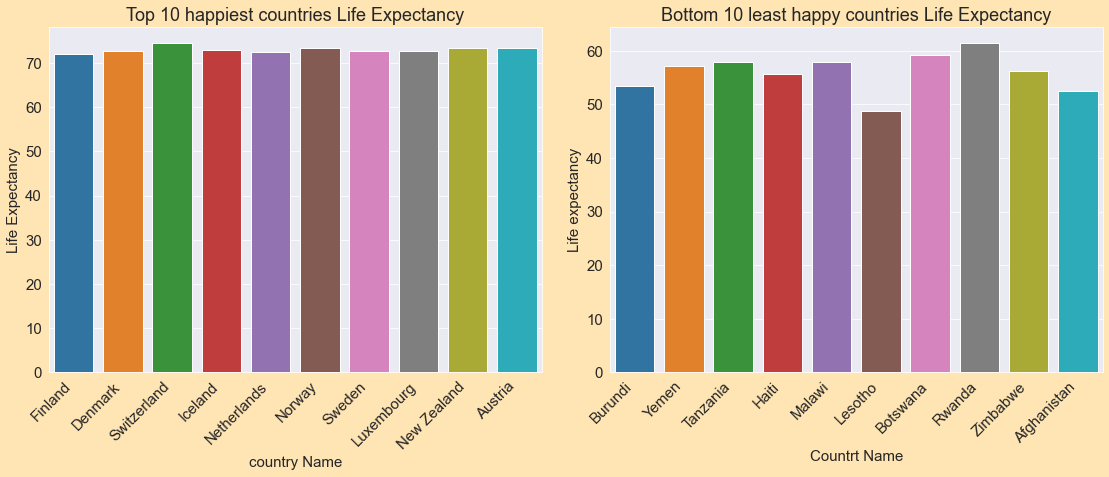

In [21]:
fig, axes= plt.subplots(1,2,figsize= (16,6))
plt.tight_layout(pad=2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels,rotation = 45, ha='right')
sns.barplot(x=top_10.country_name,y=top_10.healthy_life_expectancy,ax=axes[0])
axes[0].set_xlabel('country Name')
axes[0].set_ylabel('Life Expectancy')


xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x= bottom_10.country_name,y=bottom_10.healthy_life_expectancy,ax=axes[1])
axes[1].set_xlabel('Countrt Name')
axes[1].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness score')

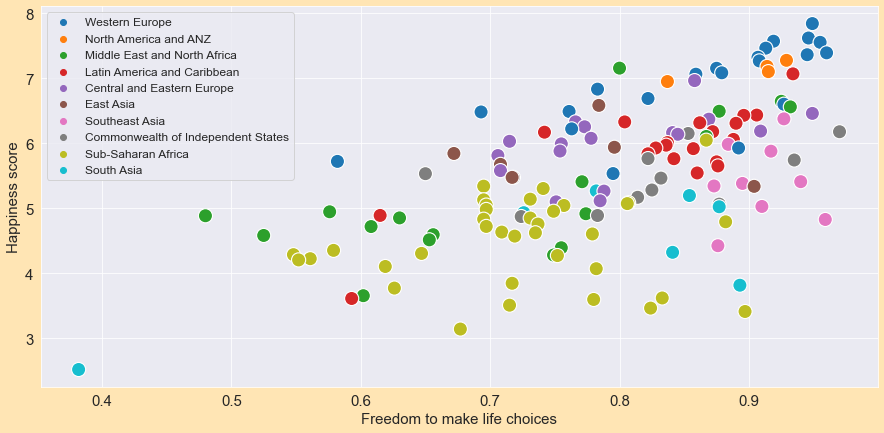

In [24]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=world_df.freedom_to_make_life_choices,y=world_df.happiness_score,hue=world_df.regional_indicator,s = 200)
plt.legend(loc='upper left' , fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')

<BarContainer object of 10 artists>

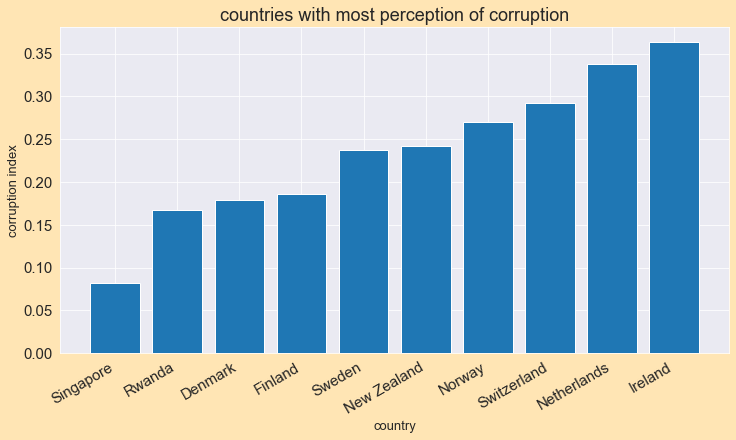

In [27]:
country = world_df.sort_values(by='perception_of_corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('countries with most perception of corruption')
plt.xlabel('country',fontsize = 13)
plt.ylabel('corruption index',fontsize=13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name,country.perception_of_corruption)

# corruption vs happiness

Text(0, 0.5, 'Corruption')

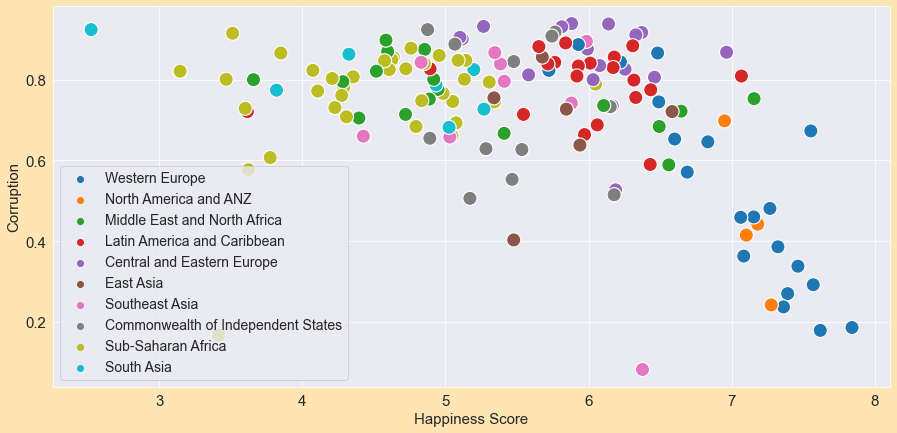

In [28]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x=world_df.happiness_score, y =world_df.perception_of_corruption, hue=world_df.regional_indicator,s=200)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')